In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import statsmodels.api as sm

Вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

В первом **тестировали разрешение фотографий блюд** в приложении: пользователям показывались либо прямоугольные, либо новые квадратные.

Во втором: **была обновлена кнопка заказа**, и часть юзеров видела старый вариант, а часть – новый.

Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

In [2]:
meal_1 = pd.read_csv('https://stepik.org/media/attachments/lesson/385920/5_task_1.csv')

meal_2 = pd.read_csv('https://stepik.org/media/attachments/lesson/385920/5_task_2.csv')

In [3]:
meal_1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [5]:
meal_A = meal_1.query('group == "A"').events
meal_B = meal_1.query('group == "B"').events
meal_C = meal_1.query('group == "C"').events

С помощью теста Левена определяем, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными).

In [6]:
stats.levene(meal_A, meal_B, meal_C)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

**p-value > 0.05, не отклоняем нулевую гипотезу**

In [7]:
stats.shapiro(meal_A.sample(1000, random_state=17))

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [8]:
stats.shapiro(meal_B.sample(1000, random_state=17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [9]:
stats.shapiro(meal_C.sample(1000, random_state=17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

**Данные распределены нормально**

In [10]:
stats.f_oneway(meal_A, meal_B, meal_C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

Для сравнения средних я использую однофакторный дисперсионный анализ (f_oneway).

Значение статистики равно 2886, 

р-уровень значимости составил 0.0

In [11]:
print(pairwise_tukeyhsd(meal_1['events'], groups=meal_1['group']).summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


**Между всеми группами есть статистически значимые различия.** Используем картинки В

In [4]:
meal_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


Так как требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента, мы используем **многофакторный дисперсионный анализ**. 

C:\Users\mysur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='events', ylabel='Density'>

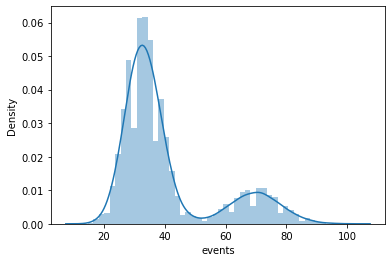

In [12]:
sns.distplot(meal_2.query('group == "test"').events)

C:\Users\mysur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='events', ylabel='Density'>

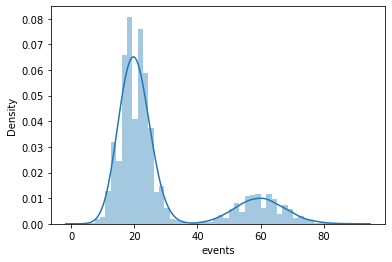

In [13]:
sns.distplot(meal_2.query('group == "control"').events)

In [14]:
meal_2.query('group == "control" and segment == "high"').describe()

,id,events
count,10000.000000,10000.000000
mean,50473.978200,59.970800
std,28761.438914,7.805347
min,10.000000,31.000000
25%,25612.500000,55.000000
50%,51031.000000,60.000000
75%,75261.250000,65.000000
max,99976.000000,89.000000


In [15]:
meal_2.query('group == "control" and segment == "low"').describe()

,id,events
count,40000.000000,40000.000000
mean,49935.256700,20.031575
std,28855.849243,4.473576
min,0.000000,4.000000
25%,25022.250000,17.000000
50%,49944.500000,20.000000
75%,74874.250000,23.000000
max,99999.000000,41.000000


In [16]:
meal_2.query('group == "test" and segment == "low"').describe()

,id,events
count,40000.000000,40000.000000
mean,49913.343600,33.025925
std,28917.383492,5.720845
min,1.000000,13.000000
25%,24763.750000,29.000000
50%,49706.500000,33.000000
75%,75127.250000,37.000000
max,99995.000000,59.000000


In [17]:
meal_2.query('group == "test" and segment == "high"').describe()

,id,events
count,10000.000000,10000.000000
mean,50126.620600,69.938500
std,28821.133487,8.403974
min,14.000000,40.000000
25%,25317.500000,64.000000
50%,50234.500000,70.000000
75%,74783.250000,76.000000
max,99996.000000,102.000000


In [18]:
model = smf.ols(formula='events ~ segment + group + segment:group', data=meal_2).fit()
aov_table = anova_lm(model, typ=2)

In [19]:
print(round(aov_table, 2))

                    sum_sq       df          F  PR(>F)
segment        23624796.65      1.0  689756.38     0.0
group           3837195.41      1.0  112031.86     0.0
segment:group     36642.44      1.0    1069.82     0.0
Residual        3424955.89  99996.0        NaN     NaN


In [20]:
meal_2['combination'] = meal_2.group + ' \ ' + meal_2.segment

In [21]:
meal_2

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high
...,...,...,...,...,...
99995,60695,control,low,15.0,control \ low
99996,5934,control,low,16.0,control \ low
99997,30046,control,low,22.0,control \ low
99998,26474,control,low,21.0,control \ low


In [22]:
print(pairwise_tukeyhsd(meal_2['events'], groups=meal_2['combination']).summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392 0.001 -40.1073 -39.7711   True
control \ high   test \ high   9.9677 0.001   9.7551  10.1803   True
control \ high    test \ low -26.9449 0.001  -27.113 -26.7768   True
 control \ low   test \ high  49.9069 0.001  49.7388   50.075   True
 control \ low    test \ low  12.9944 0.001   12.888  13.1007   True
   test \ high    test \ low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


**Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13**

**Для обоих сегментов показатели статистически значимо увеличились по сравнению с контрольной группой**

**Разница между control/high и test/high составила около 10**

<AxesSubplot:xlabel='group', ylabel='events'>

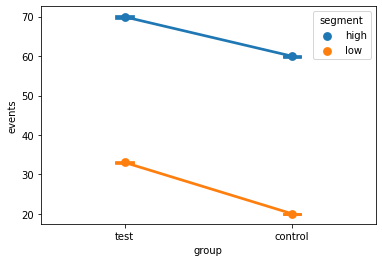

In [24]:
sns.pointplot(x='group', y='events', hue='segment', data=meal_2, capsize= .1)

Фактор group оказался значимым,
фактор segment – значимым,
их взаимодействие – значимо. 

Судя по графику, для всех групп среднее значение events увеличилось, поэтому решение:
    
**выкатываем новую версию**
